# Chapter 3: Moving One note, or Many Notes: Two Categories of Modulation

___

Quick review: here is a major scale, given as the least-entropic sequence in the circle of fifths.

The major scale separates 12 bits into 2 strictly definable areas.

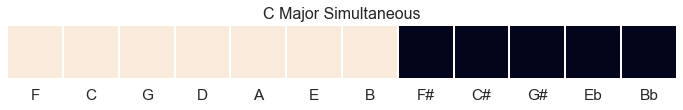

In [37]:
import numpy as np
import pt_utils
import pt_musicutils
import pt_naming_conventions
import pt_keypattern
import pt_analyzeaudio
import IPython.display as ipd
import jupyter_pt_tools as jpt_pt

c_major = 0b111111100000
jpt_pt.notegroup_heatmap(c_major, title="C Major Simultaneous")
ipd.Audio(jpt_pt.notegroup_wavepile(c_major), rate=4000)

Seven-note chords are at the limit for our understanding simultaneous sounds. So here is the same scale as a sequence:

In [4]:
ipd.Audio(jpt_pt.notegroup_wavestep(c_major), rate=4000)

# Navigating the Circle of Fifths

In this scheme, the circle of fifths is a bit-shift:

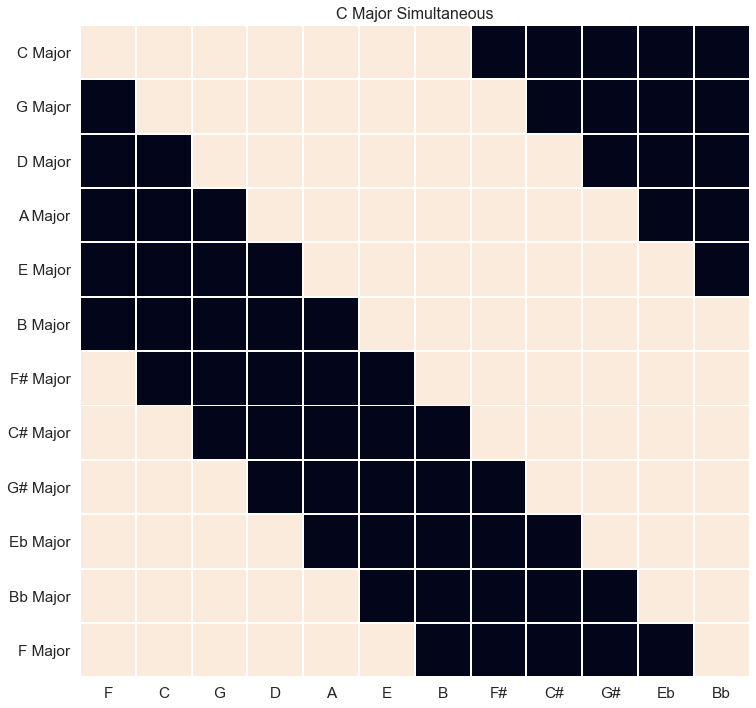

In [5]:
modulation = np.array([pt_utils.rotate_bits_right(0b111111100000, i) for i in range(12)])
yticks = [pt_naming_conventions.circle_fifth_notes(k=0)[(i+1)%12] + " Major" for i in range(12)]
jpt_pt.multiple_notegroup_heatmap(modulation, yticks=yticks, title="C Major Simultaneous")

kpdve_modulation = [[i, 0, 1, 0, 0] for i in range(12)]
patterns = [mode + disp for mode, disp in [pt_musicutils.get_tonic_mode_disp_tuple(kpdve) for kpdve in kpdve_modulation]]
sequence = jpt_pt.link_ordered_wavestep_sequences(patterns, duration=10)
ipd.Audio(sequence, rate=4000)

# Navigating Patterns (Minor and related keys)

In the model above, each modulation can be seen either as 

1. moving all the bits to the right one space or
2. moving one bit to the right seven spaces.

When we move one bit at a time to the right seven spaces we get a curious pattern: all of the related keys (melodic minor, harmonic minor) show up.

This forms the basis for the flexibility of a system to be explained in the next chapter, known by five parameters: KPDVE

The P parameter not only allows for flexibility of modes: it protects long-term orientation in the analysis and hearing of tonal music.

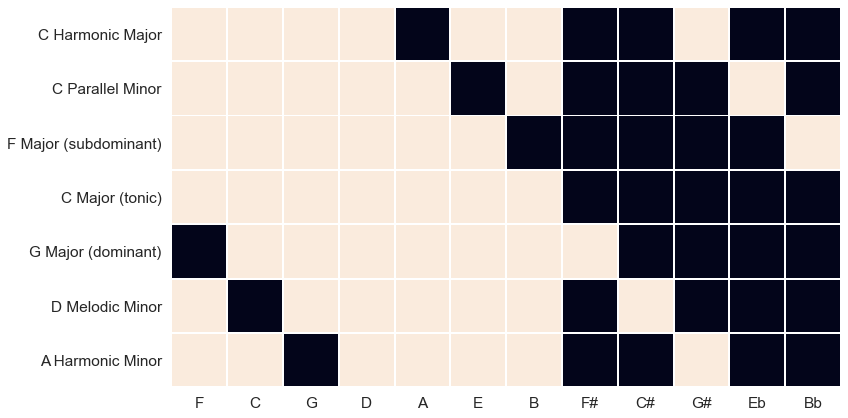

In [23]:
key = 0
modes = [pt_keypattern.get_binary_KP(key, (i + 4)%7) for i in range(7)]
kpdve_patterns = [[key, (i + 4)%7, 0, 0, 0] for i in range(7)]
tonics = [pt_naming_conventions.conv_tonic_name_for_kpdve(kpdve_patterns[i]) for i in range(7)]
yticks = [tonics[i] + " " + pt_naming_conventions.PATTERN_CONVENTIONAL_NAMES[(i + 4)%7] for i in range(7)]
jpt_pt.multiple_notegroup_heatmap(modes, yticks=yticks)

patterns = [mode + disp for mode, disp in [pt_musicutils.get_tonic_mode_disp_tuple(kpdve) for kpdve in kpdve_patterns]]
sequence = jpt_pt.link_ordered_wavestep_sequences(patterns, duration=10)
ipd.Audio(sequence, rate=4000)

This is a very powerful set of patterns, yielding a huge amount of meaningful and colorful chords. It shows how changes in major/minor tone centers can be seen as shadows of full modulations, and implies how they might substitute for one another.

# "Practical" application...

Keys are not just theoretical categories. They are areas for both memory and prediction: things happen inside of them.

In the next chapter we shall see why this is so powerful, finding infinite chord patterns - and their harmonic functions - in the seven-tone scale.

We will see how that seven tone scale can function as an identity matrix for virtually any harmonic analysis on a binary device.

In the meantime, here is a blues progression, which can be freely filtered based on K and P categories.

In [41]:
one_dom = 163
four_dom = 3171
five_dom = 739

blues = [one_dom] * 4
blues += [four_dom]* 2
blues += [one_dom]* 2
blues += [five_dom, four_dom]
blues += [one_dom] * 2

In [42]:
blues_bin = [bin(a) for a in blues]

In [43]:
blues_kpdve = [pt_utils.binary_encoding_to_KPDVE(a_num) for a_num in blues]

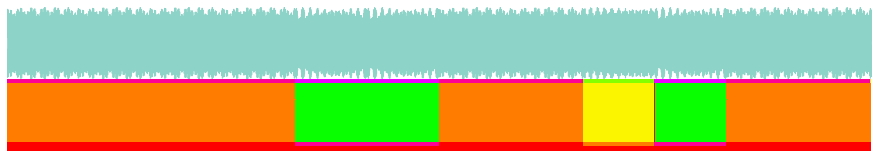

In [45]:
bin_seq = [pt_keypattern.get_binary_KPDVE_chord(a_kpdve) for a_kpdve in blues_kpdve]
sequence = jpt_pt.link_wavepile_sequences(bin_seq, duration=20)
filename = "blues.wav"

jpt_pt.norm_wave_write(sequence, filename)
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.5, key_orientation=blues_kpdve[-1])
ipd.Audio(filename, rate=4000)